# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker

fake = Faker(locale='en_US')

In [2]:
## Employee Dataset

def create_employees(num):   

    
    state_list= ["Delaware", "Maryland", "Massachusetts", "New Jersey", "New York", "Pennsylvania", "Virginia"]

    employees = [{'Emp_ID':x+100000,
                  'First_Name':fake.first_name(),
                  'Last_Name':fake.last_name(),
                  'Phone':f'+1 ({fake.msisdn()[3:6]}) {fake.msisdn()[6:9]}-{fake.msisdn()[9:13]}',
                  'State':np.random.choice(state_list)} for x in range(num)]
        
    return employees

df_emp = pd.DataFrame(create_employees(num=10000))

df_emp.head(10)

,Emp_ID,First_Name,Last_Name,Phone,State
0,100000,Charles,Bender,+1 (369) 174-7429,Maryland
1,100001,Erika,Lee,+1 (794) 334-4023,Virginia
2,100002,Jeffrey,Herman,+1 (270) 112-0485,Delaware
3,100003,Lauren,Dodson,+1 (032) 110-7850,Massachusetts
4,100004,Emily,Owens,+1 (070) 053-4756,Maryland
5,100005,James,Duarte,+1 (256) 961-4344,Pennsylvania
6,100006,Cynthia,Brown,+1 (380) 415-5367,Pennsylvania
7,100007,Wesley,Pierce,+1 (405) 914-8556,Pennsylvania
8,100008,Gerald,Herrera,+1 (896) 794-5478,Virginia
9,100009,Todd,Mills,+1 (020) 685-3169,Massachusetts


In [3]:
## Department Dataset

dep_list= ["Marketing", "Finance", "Operations Management", "Human Resource", "IT", "R&D", "Security", "Administration", "Legal"]

data={"Dep_Id":[x+1 for x in range(9)], "Dep_Name":dep_list}

df_dep = pd.DataFrame(data)

df_dep

,Dep_Id,Dep_Name
0,1,Marketing
1,2,Finance
2,3,Operations Management
3,4,Human Resource
4,5,IT
5,6,R&D
6,7,Security
7,8,Administration
8,9,Legal


In [4]:
## Salary Dataset

def create_salary(num):   

    salary = [{'Emp_ID':x+100000,
               'Dep_Id':np.random.randint(1,10),
               'Yearly_Salary':np.random.randint(50000,150000)} for x in range(num)]
        
    return salary

df_sal = pd.DataFrame(create_salary(num=10000))

df_sal.head(10)

,Emp_ID,Dep_Id,Yearly_Salary
0,100000,8,83560
1,100001,1,84437
2,100002,2,85164
3,100003,7,73451
4,100004,4,69052
5,100005,8,62758
6,100006,3,132108
7,100007,5,89431
8,100008,9,66937
9,100009,5,103182


In [5]:
df1= pd.merge(df_emp, df_sal, on="Emp_ID")

df1

,Emp_ID,First_Name,Last_Name,Phone,State,Dep_Id,Yearly_Salary
0,100000,Charles,Bender,+1 (369) 174-7429,Maryland,8,83560
1,100001,Erika,Lee,+1 (794) 334-4023,Virginia,1,84437
2,100002,Jeffrey,Herman,+1 (270) 112-0485,Delaware,2,85164
3,100003,Lauren,Dodson,+1 (032) 110-7850,Massachusetts,7,73451
4,100004,Emily,Owens,+1 (070) 053-4756,Maryland,4,69052
...,...,...,...,...,...,...,...
9995,109995,Michael,Mitchell,+1 (920) 233-9332,Virginia,7,123724
9996,109996,Tiffany,Anderson,+1 (743) 755-8552,Maryland,6,133272
9997,109997,Annette,Juarez,+1 (049) 447-7462,Pennsylvania,4,88601
9998,109998,Joshua,Taylor,+1 (603) 217-3864,Maryland,7,58881


In [6]:
df = pd.merge(df1, df_dep, on="Dep_Id")

df= df.sort_values(by='Emp_ID')

df.reset_index(inplace=True)

df.drop("index", axis=1, inplace=True)

df

,Emp_ID,First_Name,Last_Name,Phone,State,Dep_Id,Yearly_Salary,Dep_Name
0,100000,Charles,Bender,+1 (369) 174-7429,Maryland,8,83560,Administration
1,100001,Erika,Lee,+1 (794) 334-4023,Virginia,1,84437,Marketing
2,100002,Jeffrey,Herman,+1 (270) 112-0485,Delaware,2,85164,Finance
3,100003,Lauren,Dodson,+1 (032) 110-7850,Massachusetts,7,73451,Security
4,100004,Emily,Owens,+1 (070) 053-4756,Maryland,4,69052,Human Resource
...,...,...,...,...,...,...,...,...
9995,109995,Michael,Mitchell,+1 (920) 233-9332,Virginia,7,123724,Security
9996,109996,Tiffany,Anderson,+1 (743) 755-8552,Maryland,6,133272,R&D
9997,109997,Annette,Juarez,+1 (049) 447-7462,Pennsylvania,4,88601,Human Resource
9998,109998,Joshua,Taylor,+1 (603) 217-3864,Maryland,7,58881,Security


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Emp_ID         10000 non-null  int64 
 1   First_Name     10000 non-null  object
 2   Last_Name      10000 non-null  object
 3   Phone          10000 non-null  object
 4   State          10000 non-null  object
 5   Dep_Id         10000 non-null  int64 
 6   Yearly_Salary  10000 non-null  int64 
 7   Dep_Name       10000 non-null  object
dtypes: int64(3), object(5)
memory usage: 625.1+ KB


### 1. Visualize the average salary of each department

In [8]:
grouped_df1= df.groupby("Dep_Name").agg(
    avg_sal = ('Yearly_Salary', 'mean')
    )

grouped_df1 = grouped_df1.sort_values(by="avg_sal", ascending=False)
grouped_df1.reset_index(inplace=True)

grouped_df1

,Dep_Name,avg_sal
0,Operations Management,101298.008287
1,Security,100741.458910
2,Finance,100530.667838
3,Administration,100320.693750
4,R&D,100170.193292
5,Human Resource,99478.978763
6,IT,99368.289661
7,Legal,98947.985965
8,Marketing,98510.996347


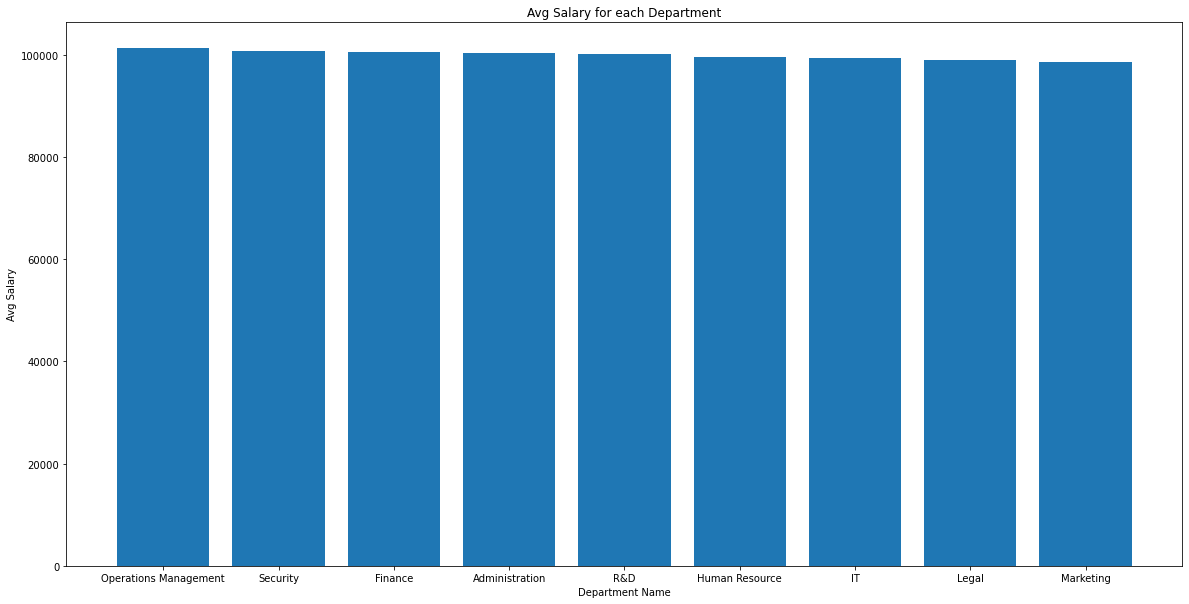

In [9]:
plt.figure(figsize = (20, 10))
plt.bar(grouped_df1["Dep_Name"], grouped_df1["avg_sal"])
plt.xlabel('Department Name')
plt.ylabel('Avg Salary')
plt.title('Avg Salary for each Department')

plt.show()

### 2. Visualize the total number of employees living in each state for each department

In [10]:
grouped_df2 = df.groupby(["State","Dep_Name"]).agg(
    total_emp = ('Emp_ID', 'count')
    )

grouped_df2.reset_index(inplace=True)

grouped_df2

,State,Dep_Name,total_emp
0,Delaware,Administration,173
1,Delaware,Finance,182
2,Delaware,Human Resource,155
3,Delaware,IT,165
4,Delaware,Legal,154
...,...,...,...
58,Virginia,Legal,162
59,Virginia,Marketing,159
60,Virginia,Operations Management,156
61,Virginia,R&D,135


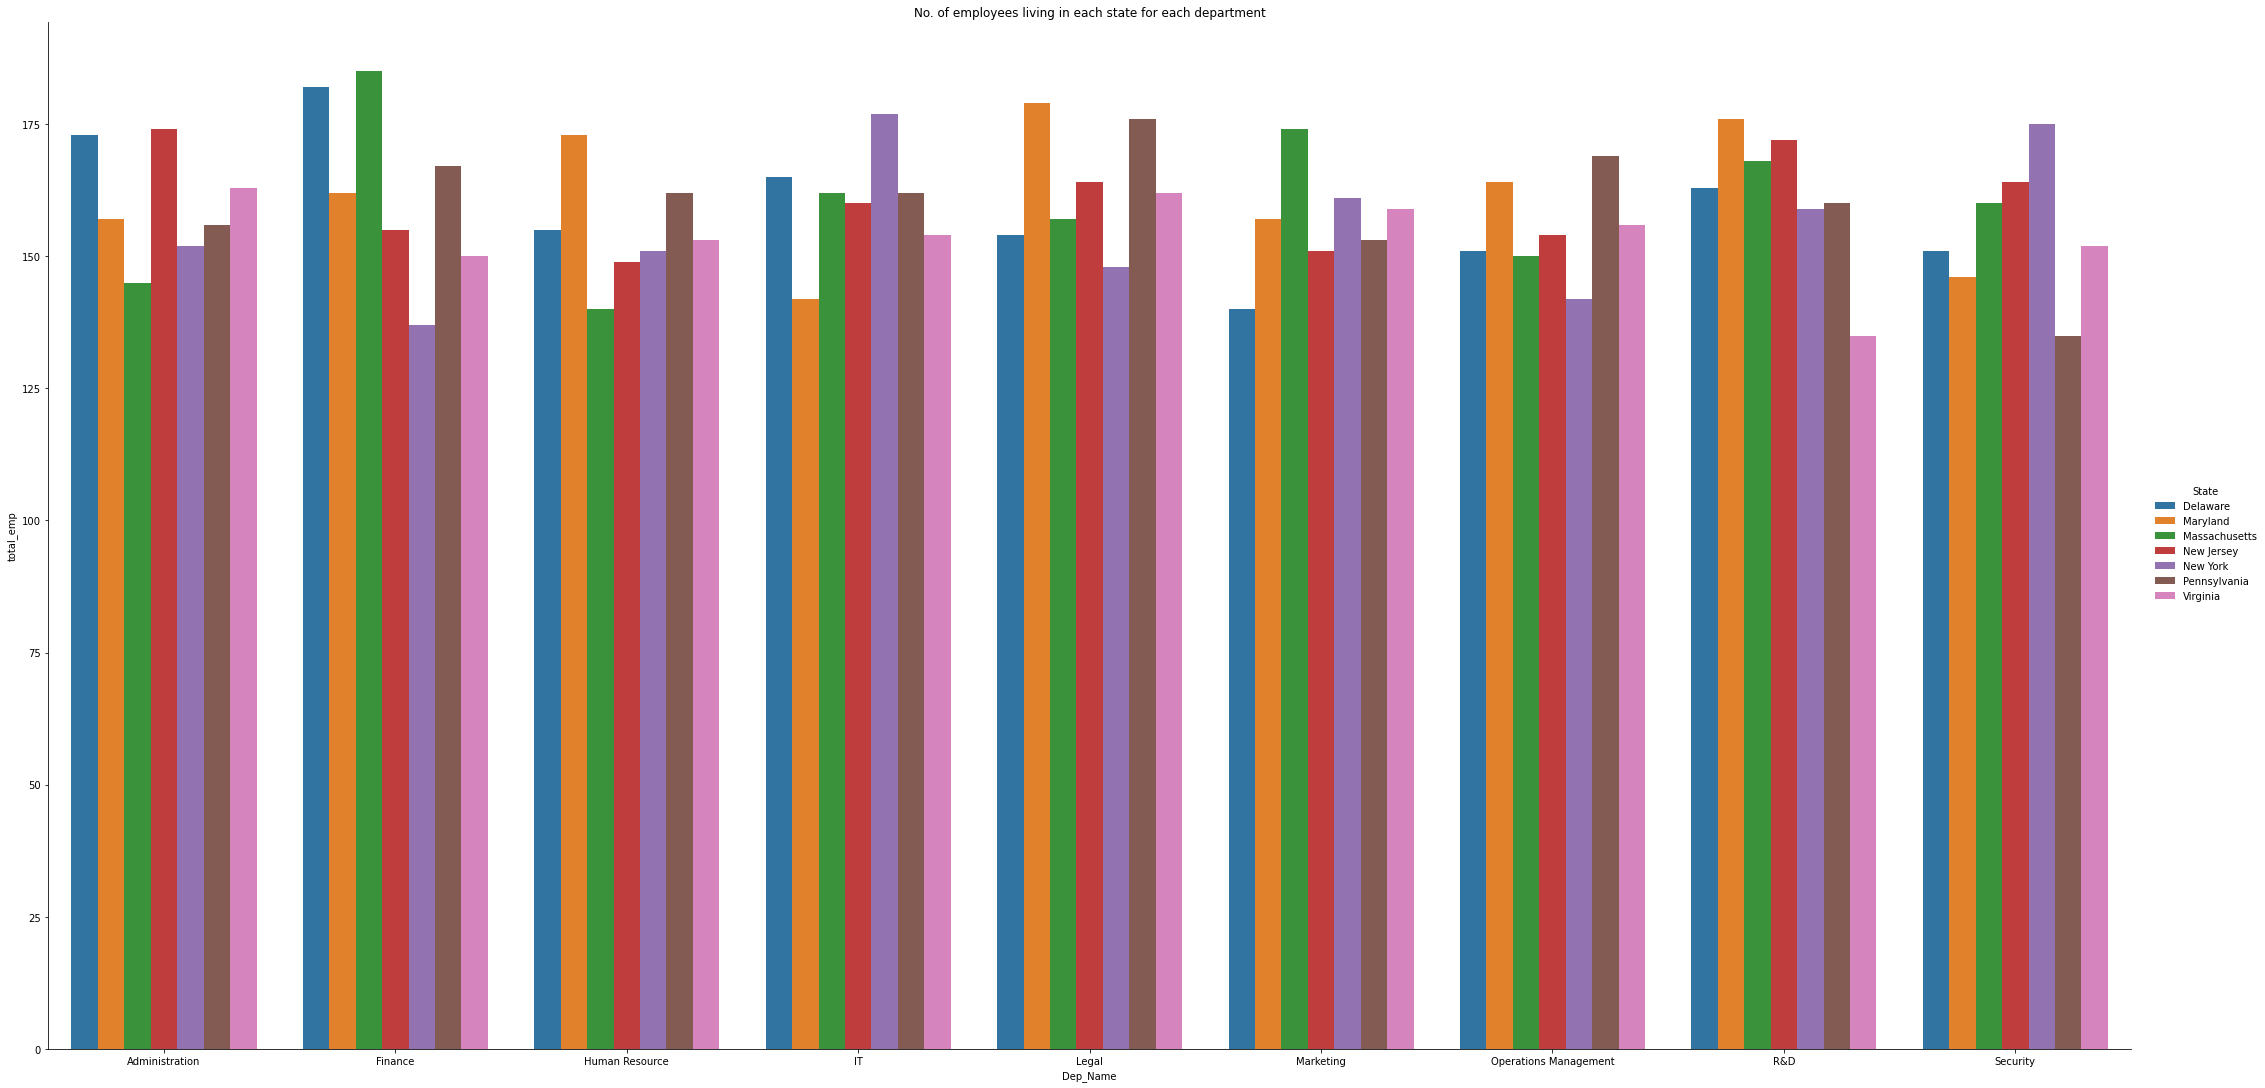

In [11]:
plot = sns.catplot(data=grouped_df2, kind='bar', hue="State", y="total_emp", x="Dep_Name", aspect=2, height= 15)
plot.ax.set_title('No. of employees living in each state for each department')

plt.show()

### 3. Visualize salary distribution of different states

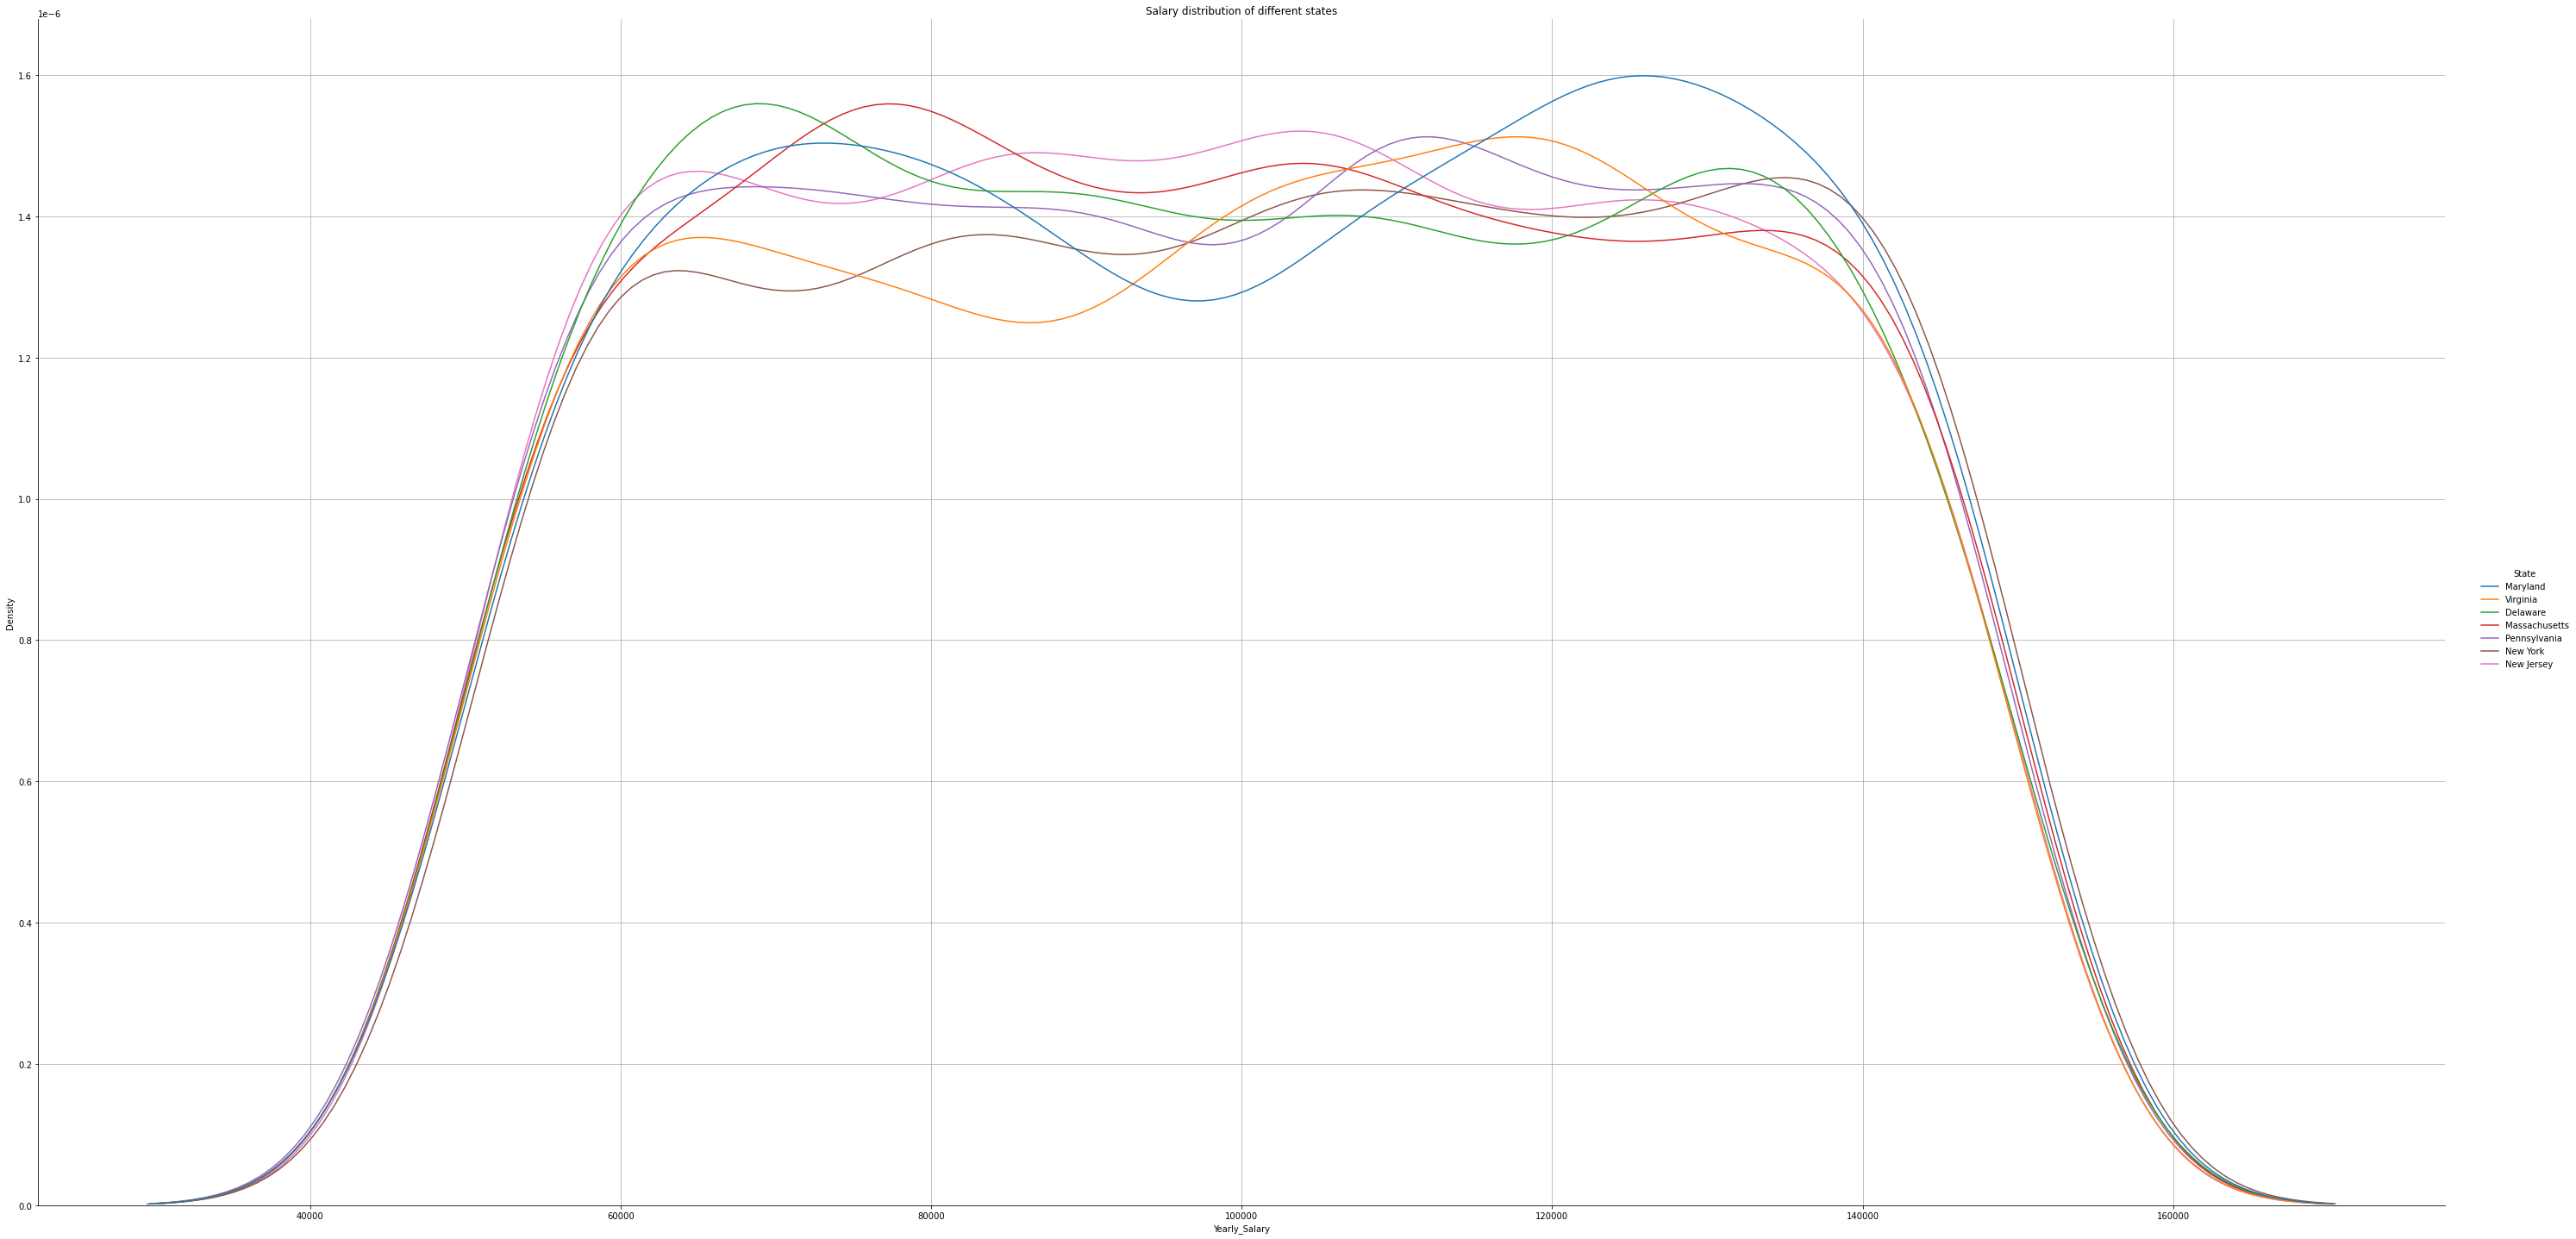

In [12]:
plot = sns.displot(data= df, kind= "kde", x= "Yearly_Salary", hue= 'State', aspect= 2, alpha= 1, height=20)
plot.set(title= "Salary distribution of different states", xlabel= "Yearly_Salary")
plot.ax.grid()

### 4. Visualize salary distribution of different departments

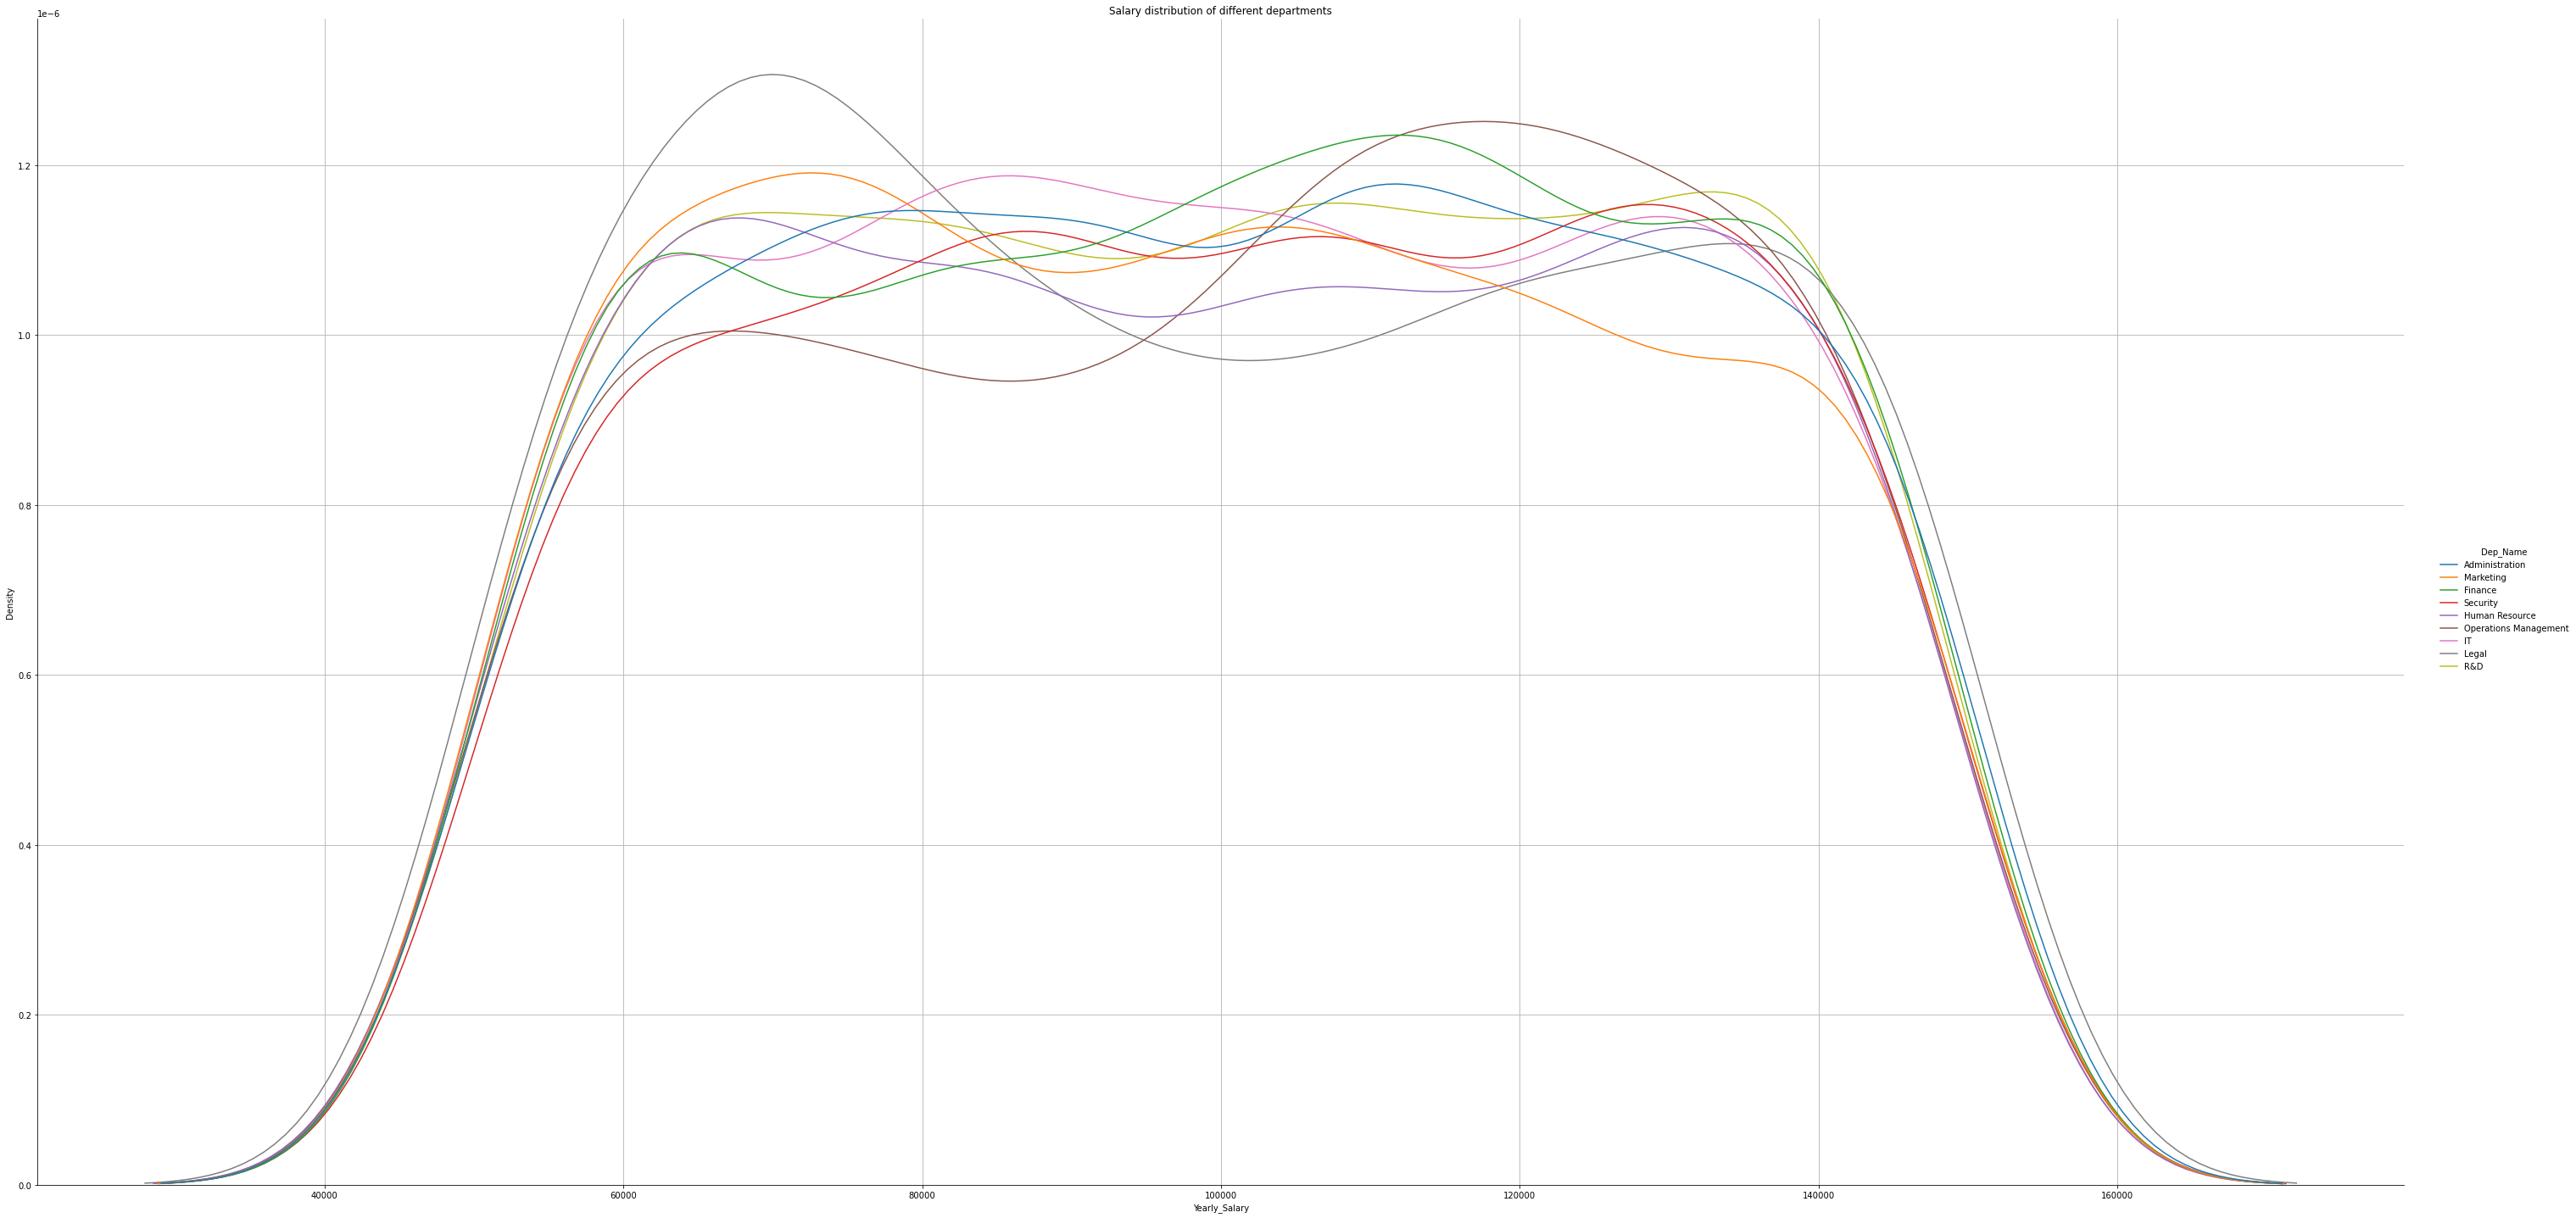

In [13]:
plot = sns.displot(data= df, kind= "kde", x= "Yearly_Salary", hue= 'Dep_Name', aspect= 2, alpha= 1, height=20)
plot.set(title= "Salary distribution of different departments", xlabel= "Yearly_Salary")
plot.ax.grid()

### References:

- https://faker.readthedocs.io/en/master/providers.html
- https://stackoverflow.com/questions/67909945/python-faker-phone-number-formatting
- https://towardsdatascience.com/generating-fake-data-with-python-c7a32c631b2a